In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("D:\\Datascience\\DataSets\\Default_Fin.csv")

In [3]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [5]:
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [6]:
df.isna().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [7]:
df.drop("Index",axis=1)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


# The number of employed who defaulted on loans

In [19]:
df["Defaulted?"].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

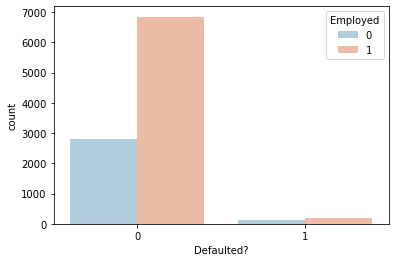

In [15]:
sns.countplot(x="Defaulted?",hue="Employed" ,data=df,palette='RdBu_r')

# Distribution of Bank Balance

<AxesSubplot:xlabel='Bank Balance', ylabel='Density'>

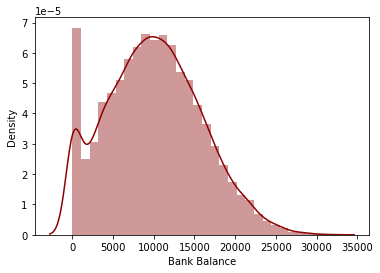

In [16]:
sns.distplot(df['Bank Balance'].dropna(),kde=True,color="darkred",bins=30)

In [8]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [9]:
x

,Index,Employed,Bank Balance,Annual Salary
0,1,1,8754.36,532339.56
1,2,0,9806.16,145273.56
2,3,1,12882.60,381205.68
3,4,1,6351.00,428453.88
4,5,1,9427.92,461562.00
...,...,...,...,...
9995,9996,1,8538.72,635908.56
9996,9997,1,9095.52,235928.64
9997,9998,1,10144.92,703633.92
9998,9999,1,18828.12,440029.32


In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=27)

In [11]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [12]:
from sklearn.metrics import accuracy_score
print(f"Accuracy:-{accuracy_score(ytest,ypred)}")

Accuracy:-0.962


# Evaluation Metrics

In [13]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2892
           1       0.00      0.00      0.00       108

    accuracy                           0.96      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.93      0.96      0.95      3000



In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[2886    6]
 [ 108    0]]
